In [3]:
!pip install kaggle --upgrade

     ---------------------------------------- 0.0/83.6 kB ? eta -:--:--
     ---------------------------------------- 83.6/83.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
     ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
     ---------------------------------------- 78.2/78.2 kB ? eta 0:00:00
Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110693 sha256=1aa6567b39021f602814a96d89750e6fb62e35fc8dac23003c0deba887b7b3f0
  Stored in directory: c:\users\cgw95\appdata\local\pip\cache\wheels\43\4b\fb\736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle


In [7]:
!pip show kaggle

Name: kaggle
Version: 1.5.16
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: c:\users\cgw95\anaconda3\envs\kaggle\lib\site-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [8]:
!kaggle competitions download -c competitive-data-science-predict-future-sales


  0%|          | 0.00/15.1M [00:00<?, ?B/s]
  7%|6         | 1.00M/15.1M [00:00<00:05, 2.77MB/s]
 20%|#9        | 3.00M/15.1M [00:00<00:01, 6.51MB/s]
 40%|###9      | 6.00M/15.1M [00:00<00:00, 12.6MB/s]
 66%|######6   | 10.0M/15.1M [00:00<00:00, 19.1MB/s]
 86%|########6 | 13.0M/15.1M [00:00<00:00, 20.3MB/s]
100%|##########| 15.1M/15.1M [00:00<00:00, 16.7MB/s]


In [11]:
import shutil
filename = 'competitive-data-science-predict-future-sales.zip'  # 압축 해제할 파일 이름
extrac_dir = 'Predict_Future_Sales_data'  # 압축 해제할 폴더 이름
archive_format = 'zip'  # 압축 파일 형태
shutil.unpack_archive(filename, extrac_dir, archive_format)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
items = pd.read_csv('./Predict_Future_Sales_data/items.csv')
cate = pd.read_csv('./Predict_Future_Sales_data/item_categories.csv')
train = pd.read_csv('./Predict_Future_Sales_data/sales_train.csv')
shops = pd.read_csv('./Predict_Future_Sales_data/shops.csv')
test = pd.read_csv('./Predict_Future_Sales_data/test.csv')

In [3]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
cate.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [8]:
# null값 여부 확인(모든 데이터 확인)
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [9]:
# 겹치는값 여부 확인
sum(cate.duplicated()), sum(items.duplicated()), sum(train.duplicated()) , sum(shops.duplicated()), sum(test.duplicated())

(0, 0, 6, 0, 0)

In [10]:
train[train.duplicated() == True]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


In [11]:
# 중복 데이터 제거
train.drop_duplicates(inplace=True)

In [12]:
sum(train.duplicated())

0

## 이상치 확인 및 제거

<Axes: xlabel='item_price'>

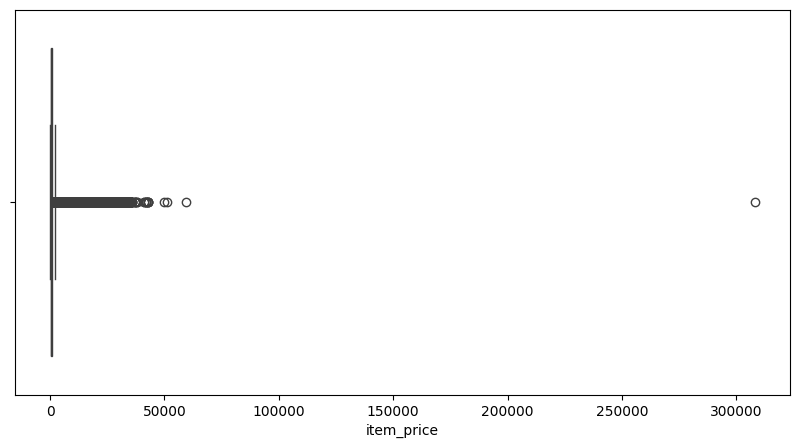

In [13]:
# 이상치 확인
plt.figure(figsize=(10,5))
# plt.xlim(0,80000)
sns.boxplot(x=train.item_price)

<Axes: xlabel='item_cnt_day'>

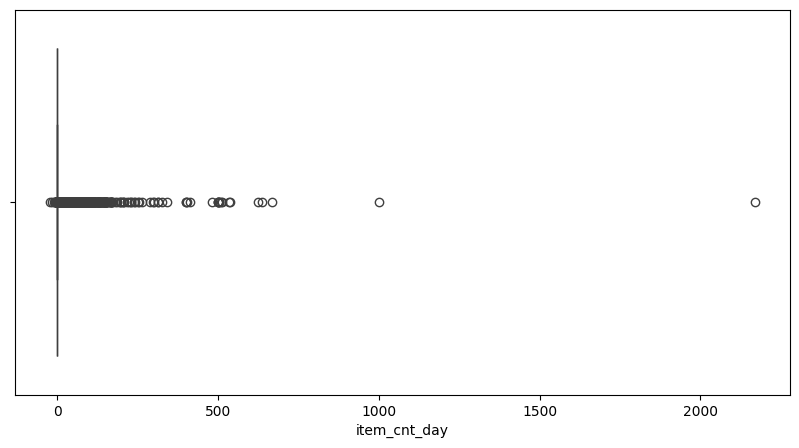

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train.item_cnt_day)

In [15]:
train = train[train.item_price<100000]
train = train[train.item_cnt_day<1001]

In [16]:
train = train[train.item_price>=0]
train = train[train.item_cnt_day>=0]

## shop 정보

In [17]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [18]:
# 도시 이름만 따로 뽑아서 나타낸다
shops['city'] = shops['shop_name'].str.split().map(lambda x: x[0])

In [19]:
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [20]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
# fit을 사용하여 LabelEncoder를 'shops'데이터프레임의 'city'열의 값에 맞춘다.
lb.fit(list(shops['city'].values))
# transform을 사용하여 'shops'데이터프레임의 'city'열의 값을 숫자로 변환한다.
shops['city'] = lb.transform(list(shops['city'].values))

In [21]:
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,0
1,"!Якутск ТЦ ""Центральный"" фран",1,0
2,"Адыгея ТЦ ""Мега""",2,1
3,"Балашиха ТРК ""Октябрь-Киномир""",3,2
4,"Волжский ТЦ ""Волга Молл""",4,3


In [22]:
shops.drop(['shop_name'], axis=1, inplace=True)

## cate정보

In [23]:
cate.head() # name 가장 앞글자가 제품의 타입이다

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [24]:
cate['split'] = cate['item_category_name'].str.split('-')

In [25]:
cate['type'] = cate['split'].map(lambda x: x[0].strip())

In [26]:
cate.head()

,item_category_name,item_category_id,split,type
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары


In [27]:
lb = LabelEncoder()
lb.fit(list(cate['type'].values))
cate['type_code'] = lb.transform(list(cate['type'].values))

In [28]:
cate.head()

,item_category_name,item_category_id,split,type,type_code
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC,0
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары,1
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары,1
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары,1
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары,1


In [29]:
cate['sub_type'] = cate['split'].map(lambda x: x[1].strip() if len(x)>1 else x[0].strip())

In [30]:
cate.head()

,item_category_name,item_category_id,split,type,type_code,sub_type
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC,0,Гарнитуры/Наушники
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары,1,PS2
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары,1,PS3
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары,1,PS4
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары,1,PSP


In [31]:
lb = LabelEncoder()
lb.fit(list(cate['sub_type'].values))
cate['sub_code'] = lb.transform(list(cate['sub_type'].values))

In [32]:
cate.head()

,item_category_name,item_category_id,split,type,type_code,sub_type,sub_code
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC,0,Гарнитуры/Наушники,29
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары,1,PS2,9
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары,1,PS3,10
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары,1,PS4,11
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары,1,PSP,13


In [35]:
# 라벨 인코더 이후 문자형 데이터 drop
cate = cate[['item_category_id', 'type_code', 'sub_code']]

In [36]:
cate.head()

,item_category_id,type_code,sub_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13


## items 정보

In [39]:
# item_id로 분류 가능하기 때문에 name drop
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [41]:
items.drop(['item_name'], axis=1, inplace=True)

In [42]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [45]:
len(set(test.item_id)), len(test.shop_id.unique())

(5100, 42)

In [47]:
len(set(test.item_id)) * len(test.shop_id.unique())

214200

In [46]:
len(test.item_id)

214200

In [50]:
len(set(test.item_id) - set(train.item_id))
# test에는 있지만 train에 없는 item_id가 있다.
# 이것들은 0개가 판매됐다고 예측해야함

363

In [51]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
